# Logistic Regression Project -- Predict Digital Conversions

Este proyecto se basa en entender si ciertas características de la experiencia del usuario pueden estimar las conversiones en un sitio web. Los datos corresponden a los resultados de la pauta digital en anuncios de Facebook en un pais de Europa Central durante 12 meses. 

La base de datos tiene estas características:

- '`Audiencia`': origen del publico que mira anuncios ('Lookalike 10%': publico similar a compradores anteriores, 'Web and Facebook retargeting': visitantes al perfil de redes sociales y sitio web que no compraron, Interests and behaviors: personas que consumen contenido afin al contenido de los anuncios )
- '`Campaña`': contenido de los anuncios
- '`Conversion`': persona que hace una compra (1) o no (0)
- '`Ventas`': numero de conversiones
- '`Alcance`': Personas que han visto anuncios
- '`Importe gastado (USD)`': inversion en publicidad de medios digitales
- '`Impresiones`': Veces que un anuncio es visto
- '`Clics en el enlace`': Veces que se pincha un anuncio y que genera trafico al sitio web
- '`Clics (todos)`': Veces que un anuncio es pinchado (reacciones, comentarios, trafico al sitio web)

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# La base de datos

In [136]:
df = pd.read_csv('data/Proyeccion_ventas_0_1.csv', sep=',', encoding='latin-1')
df.head()

,Audiencia,Campaña,Conversion,Ventas,Alcance,Importe gastado (USD),Impresiones,Clics en el enlace,Clics (todos)
0,Interests and behaviors,Donation TD - Every Day - May 23,0,0,19828,61.24,21578,14,536
1,Lookalikes 10%,Donation TD - Every Day - May 23,1,1,29528,100.91,33154,23,561
2,Interests and behaviors,Donation TD - Every Day - May 23,0,0,6616,21.18,7197,2,160
3,Lookalikes 10%,Donation TD - Every Day - May 23,1,1,26921,98.40,30011,26,431
4,Lookalikes 10%,Donation TD - Every Day - May 23,1,1,24264,93.77,27608,21,384


# EDA

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Audiencia              1296 non-null   object 
 1   Campaña                1296 non-null   object 
 2   Conversion             1296 non-null   int64  
 3   Ventas                 1296 non-null   int64  
 4   Alcance                1296 non-null   int64  
 5   Importe gastado (USD)  1296 non-null   float64
 6   Impresiones            1296 non-null   int64  
 7   Clics en el enlace     1296 non-null   int64  
 8   Clics (todos)          1296 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 91.2+ KB


In [138]:
df.describe()

,Conversion,Ventas,Alcance,Importe gastado (USD),Impresiones,Clics en el enlace,Clics (todos)
count,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000
mean,0.440586,0.891204,22216.861883,89.355833,25875.724537,79.734568,673.060957
std,0.496649,1.532066,22895.045194,89.771641,27239.294773,126.345627,820.060408
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,8088.250000,46.675000,9342.000000,14.000000,162.000000
50%,0.000000,0.000000,16732.500000,61.690000,19181.000000,38.000000,417.000000
75%,1.000000,1.000000,29292.500000,102.260000,33567.500000,84.000000,854.750000
max,1.000000,13.000000,198227.000000,963.350000,246494.000000,1123.000000,8112.000000


In [139]:
df.columns

Index(['Audiencia', 'Campaña', 'Conversion', 'Ventas', 'Alcance',
       'Importe gastado (USD)', 'Impresiones', 'Clics en el enlace',
       'Clics (todos)'],
      dtype='object')

Text(0.5, 0, 'Audiencia')

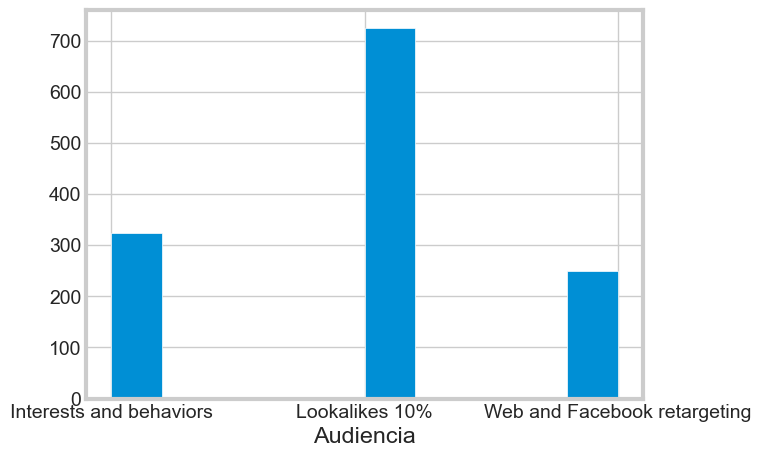

In [140]:
sns.set_style('whitegrid')
df['Audiencia'].hist(bins=10)
plt.xlabel('Audiencia')

In [141]:
pd.crosstab(df['Audiencia'], df['Conversion']).sort_values( 1,ascending = False).tail(3)

Conversion,0,1
Audiencia,,
Lookalikes 10%,421,303
Interests and behaviors,179,144
Web and Facebook retargeting,125,124


En promedio, el 44% de las veces que llegan al sitio web se concreta con una venta.

In [142]:
df[df['Conversion']==1]['Audiencia'].value_counts().head(3)

Audiencia
Lookalikes 10%                  303
Interests and behaviors         144
Web and Facebook retargeting    124
Name: count, dtype: int64

In [143]:
df['Audiencia'].value_counts().head(3)

Audiencia
Lookalikes 10%                  724
Interests and behaviors         323
Web and Facebook retargeting    249
Name: count, dtype: int64

In [144]:
pd.crosstab(index=df['Audiencia'],columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
Audiencia,
Lookalikes 10%,724
Interests and behaviors,323
Web and Facebook retargeting,249


In [145]:
df.isnull().sum()

Audiencia                0
Campaña                  0
Conversion               0
Ventas                   0
Alcance                  0
Importe gastado (USD)    0
Impresiones              0
Clics en el enlace       0
Clics (todos)            0
dtype: int64

In [146]:
df.head()

,Audiencia,Campaña,Conversion,Ventas,Alcance,Importe gastado (USD),Impresiones,Clics en el enlace,Clics (todos)
0,Interests and behaviors,Donation TD - Every Day - May 23,0,0,19828,61.24,21578,14,536
1,Lookalikes 10%,Donation TD - Every Day - May 23,1,1,29528,100.91,33154,23,561
2,Interests and behaviors,Donation TD - Every Day - May 23,0,0,6616,21.18,7197,2,160
3,Lookalikes 10%,Donation TD - Every Day - May 23,1,1,26921,98.40,30011,26,431
4,Lookalikes 10%,Donation TD - Every Day - May 23,1,1,24264,93.77,27608,21,384


<Axes: xlabel='Conversion', ylabel='count'>

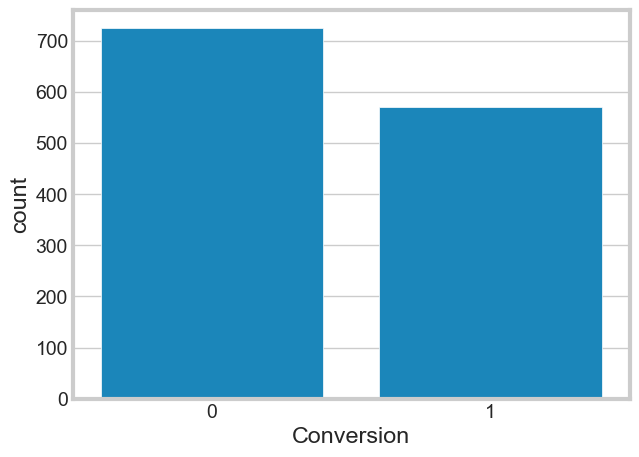

In [147]:
sns.countplot(x = 'Conversion', data = df)

<Axes: xlabel='Impresiones', ylabel='Clics en el enlace'>

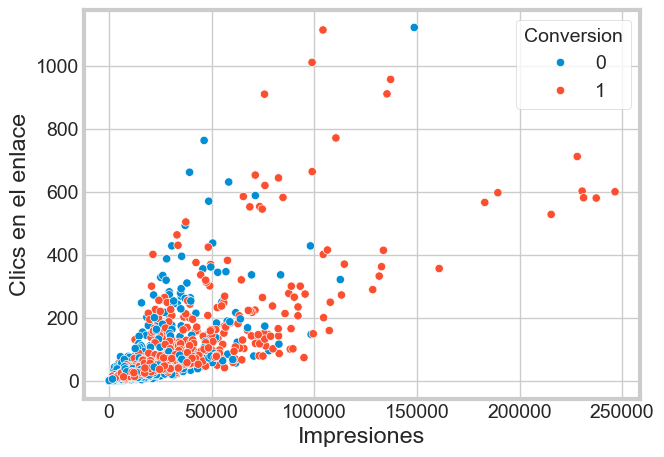

In [148]:
sns.scatterplot(x = "Impresiones", y= "Clics en el enlace",hue='Conversion', data = df) 

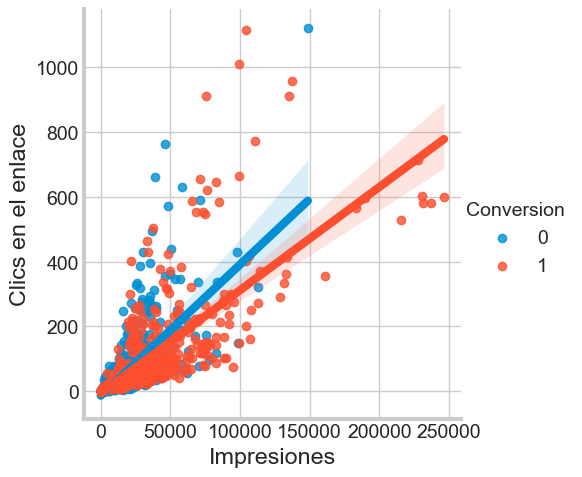

In [149]:
sns.lmplot(x = "Impresiones", y= "Clics en el enlace",hue='Conversion', data = df)

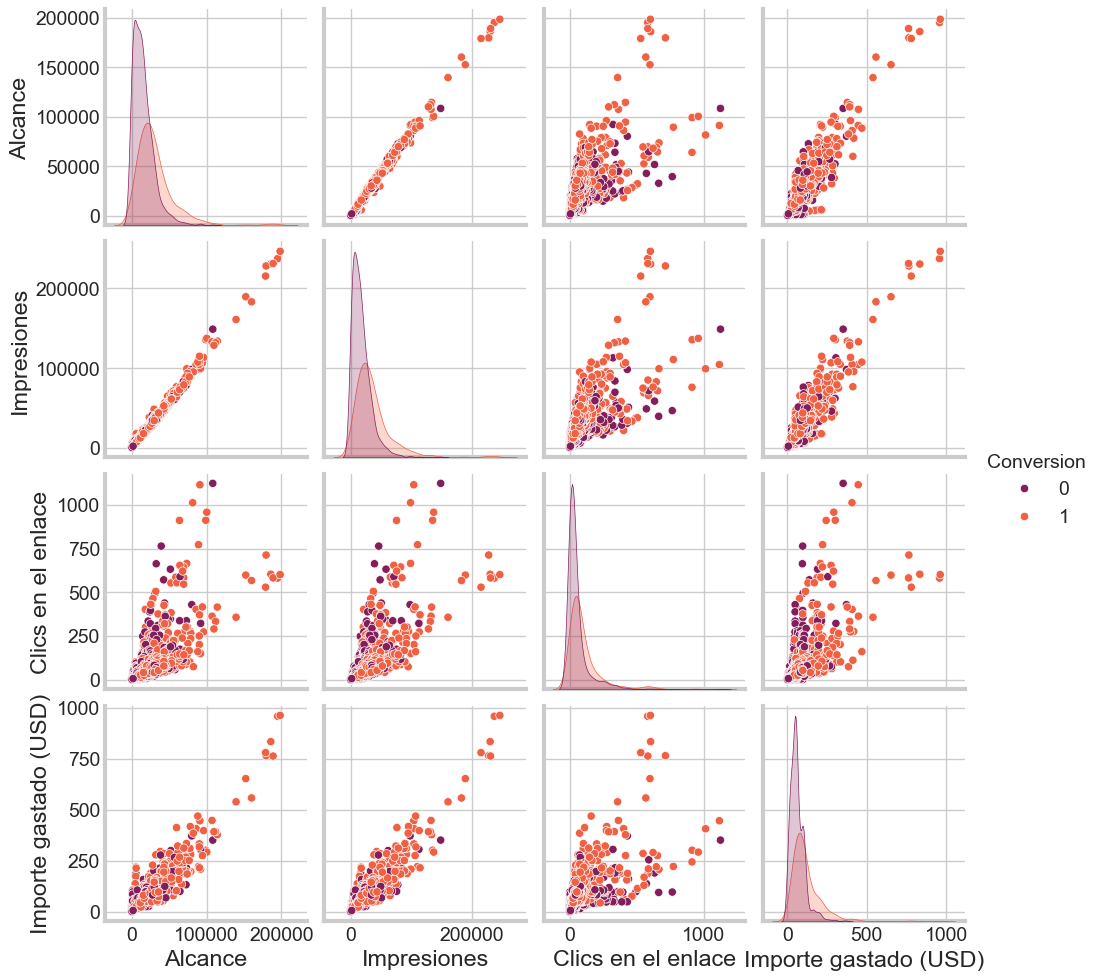

In [151]:
sns.pairplot(df, hue = 'Conversion', vars = ['Alcance', 'Impresiones', 'Clics en el enlace', 'Importe gastado (USD)'],palette = 'rocket')

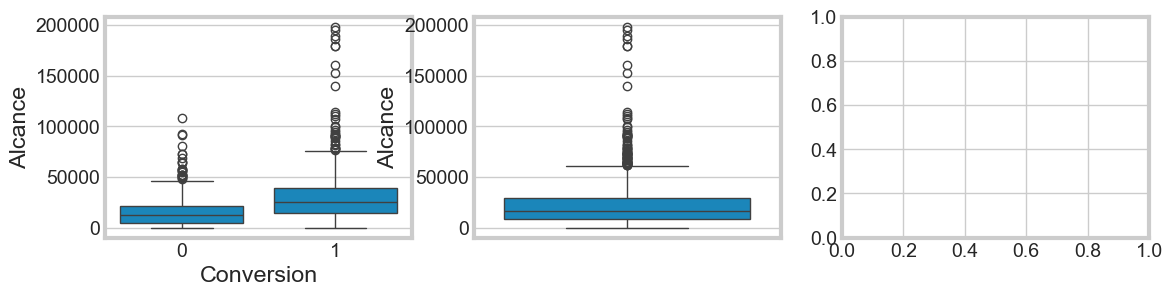

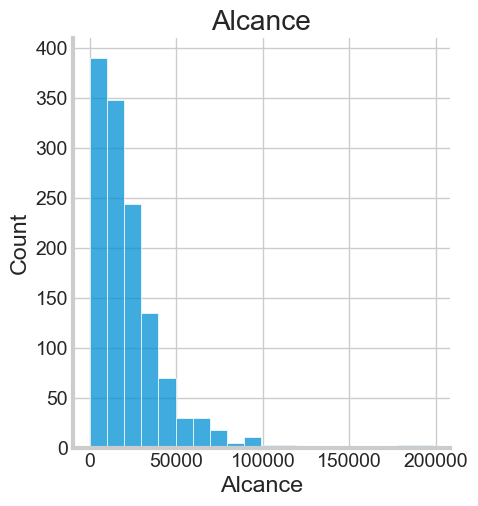

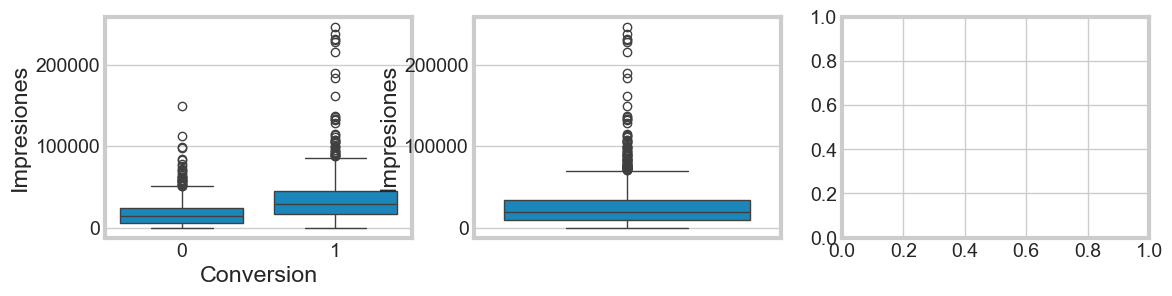

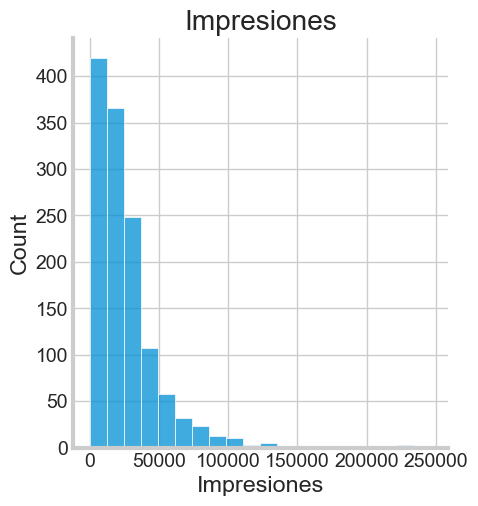

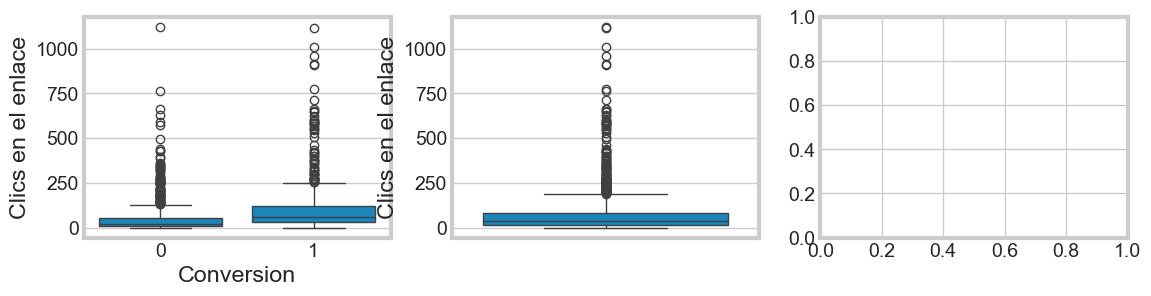

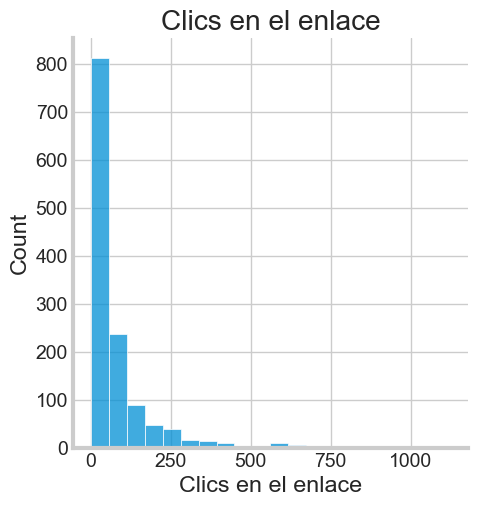

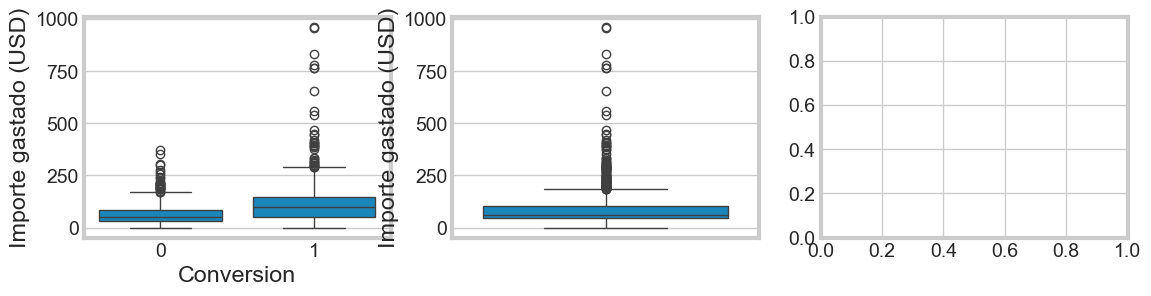

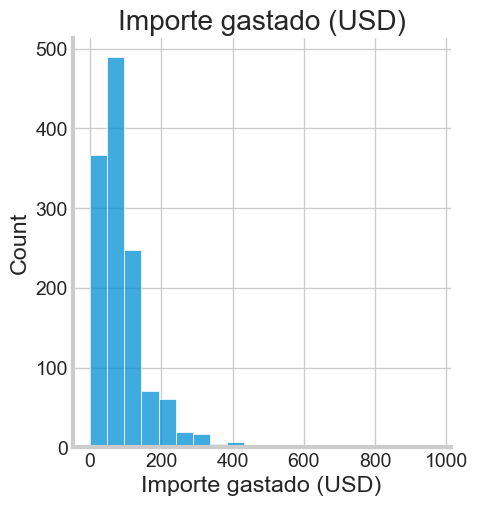

In [152]:
plots = ['Alcance', 'Impresiones', 'Clics en el enlace','Importe gastado (USD)']
for i in plots:
    plt.figure(figsize = (12, 6))
    
    plt.subplot(2,3,1)
    sns.boxplot(data= df, y=df[i],x='Conversion')
    plt.subplot(2,3,2)
    sns.boxplot(data= df, y=df[i])
    plt.subplot(2,3,3)
    sns.displot(df[i],bins= 20,)       
    plt.tight_layout()
    plt.title(i)    
    plt.show()

In [153]:
df_float = df.iloc[:,-7:] #Dejamos solo las variables numericas

In [154]:
df_float

,Conversion,Ventas,Alcance,Importe gastado (USD),Impresiones,Clics en el enlace,Clics (todos)
0,0,0,19828,61.24,21578,14,536
1,1,1,29528,100.91,33154,23,561
2,0,0,6616,21.18,7197,2,160
3,1,1,26921,98.40,30011,26,431
4,1,1,24264,93.77,27608,21,384
...,...,...,...,...,...,...,...
1291,1,11,42869,217.82,48527,105,402
1292,1,7,29915,145.03,33847,41,240
1293,1,2,35663,97.01,43495,53,543
1294,0,0,1718,6.10,1760,6,19


<Axes: >

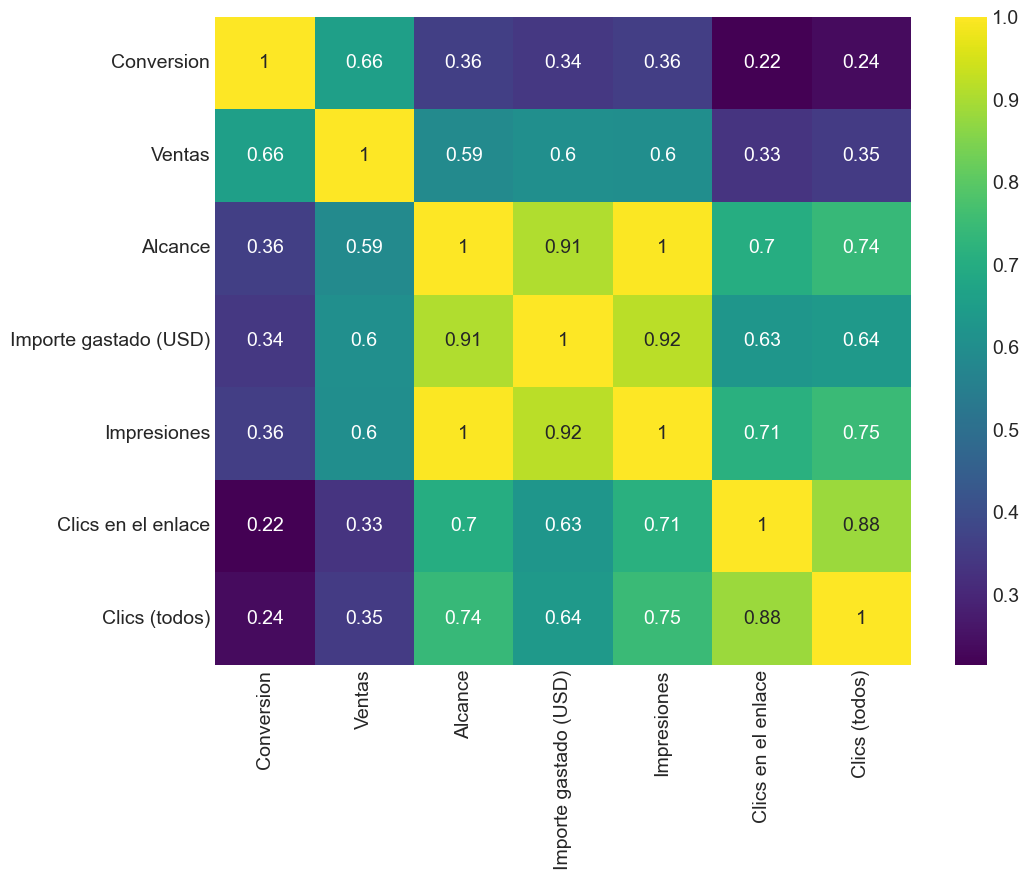

In [177]:
fig = plt.figure(figsize = (10,8))
sns.heatmap(df_float.corr(), cmap='viridis', annot = True)

# 2. Prepare Data for Logistic Regression



#### 1. Feature engineering


In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

In [157]:
X = df[['Alcance', 'Impresiones', 'Clics en el enlace','Importe gastado (USD)', 'Clics (todos)']]
y = df['Conversion']

In [158]:
X

,Alcance,Impresiones,Clics en el enlace,Importe gastado (USD),Clics (todos)
0,19828,21578,14,61.24,536
1,29528,33154,23,100.91,561
2,6616,7197,2,21.18,160
3,26921,30011,26,98.40,431
4,24264,27608,21,93.77,384
...,...,...,...,...,...
1291,42869,48527,105,217.82,402
1292,29915,33847,41,145.03,240
1293,35663,43495,53,97.01,543
1294,1718,1760,6,6.10,19


In [159]:
y

0       0
1       1
2       0
3       1
4       1
       ..
1291    1
1292    1
1293    1
1294    0
1295    1
Name: Conversion, Length: 1296, dtype: int64

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [161]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(907, 5) (907,)
(389, 5) (389,)


In [162]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (1296, 5)
Train features shape: (907, 5)
Train target shape: (907,)
Test features shape: (389, 5)
Test target shape: (389,)


In [163]:
from sklearn.linear_model import LogisticRegression

In [164]:
logmodel = LogisticRegression(solver='lbfgs')
logmodel.fit(X_train,y_train)

LogisticRegression()

In [165]:
y_pred = logmodel.predict(X_test)

In [166]:
y_pred #Prediccion de que exista una conversion en el sitio web

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [167]:
print("Predicted values:", y_pred)
print("Actual values:   ", y_test)

Predicted values: [0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0
 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0
 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0
 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1
 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0]
Actual values:    598     0
346     1
745     0
1029    1
1158    1
       ..
660     0
716     1
714     1
772     1
872     1
Name: Conversion, Length: 389, dtype: int64


In [168]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6915167095115681


In [169]:
from sklearn.metrics import classification_report

In [170]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.84      0.74       206
           1       0.74      0.52      0.62       183

    accuracy                           0.69       389
   macro avg       0.70      0.68      0.68       389
weighted avg       0.70      0.69      0.68       389



In [171]:
from sklearn.metrics import confusion_matrix

In [172]:
print(confusion_matrix(y_test, y_pred))

[[173  33]
 [ 87  96]]


In [179]:
coefficients = logmodel.coef_

In [178]:
coefficients
#'Alcance', 'Impresiones', 'Clics en el enlace','Importe gastado (USD)', 'Clics (todos)']]

array([[ 2.32682958e-05,  2.48047533e-05,  7.93088716e-04,
         6.48466882e-03, -6.69747247e-04]])

## Random Forest

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Supongamos que tienes tus datos en variables X e y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Entrena el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Haz predicciones
y_pred = rf_model.predict(X_test)

# Evalúa el rendimiento
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


[[155  51]
 [ 68 115]]
              precision    recall  f1-score   support

           0       0.70      0.75      0.72       206
           1       0.69      0.63      0.66       183

    accuracy                           0.69       389
   macro avg       0.69      0.69      0.69       389
weighted avg       0.69      0.69      0.69       389

Accuracy: 0.6940874035989717


## Conclusiones y recomendaciones

- El modelo predictivo es fiable en un 70%, lo que quiere decir que se puede controlar el 70% del resultado. El otro 30% es impredescible, en funcion de las interacciones que logre el contenido y la actividad de los anunciantes que tienen como objetivo llegar a las mismas personas con anuncios.